# Análisis numérico del hamiltoniano de Hénon-Heiles
__________________________________________________________
Andrés Felipe Riaño Quintanilla

Santiago Julio Dávila

________________________________________________
Mecánica Teórica II

Instituto de Física, Universidad de Antioquia

## Planteamiento del problema

En 1964, M. Hénon y C.Heiles estudiaban el movimiento de las estrellas alrededor del centro galáctico tratando de encontrar una tercera constante de movimiento a parte del momentum angular y la energía. Esto les llevo a proponer un potencial idealizado que restringía su acción solo al plano x, y. Este potencial se caracteriza por poseer dos términos cúbicos que involucran a las variables x e y, haciendo a las ecuaciones de movimiento resultantes no lineales y acopladas [1]. El Hamiltoniano asociado es el Hamiltoniano de Hénon-Heiles, que en coordenadas cartesianas se escribe como

\begin{equation}
H = \frac{p_x^2}{2m} + \frac{p_y^2}{2m} + \frac{1}{2}k(x^2+y^2) + \lambda \left(  x^2y - \frac{1}{3}y^3 \right) 
\end{equation}

En el presente trabajo, se pretende cumplir con los siguientes objetivos:

**a)** Graficar los contornos de nivel del potencial de Hénon-Heiles para distintos valores de la energía.

**b)** Deducir las ecuaciones Hamiltonianas de movimiento para una partícula sometida a este potencial.

**c)** Graficar las secciones de Poincaré para diferentes valores de energía mediante integración numérica. 

**d)** Graficar la trayectoria en el espacio de configuración.

**e)** Averiguar si el Hamiltoniano de Hénon-Heiles coincide con la energía.

**f)** Graficar $x$, $y$, $p_x$, y $p_y$ en función del tiempo.

## Marco teórico

**Ecuaciones de Hamilton:** el Hamiltoniano $H$ de un sistema de $s$ coordenadas generalizadas se define como 

$$ H \left( p,q,t \right)= \displaystyle\sum_{i=1}^{s} p_i \dot{q_i} -L$$

de dónde $L$ es el lagrangiano del sistema y $p_i$ y $q_i$ corresponden al i-ésimo momento conjugado y a la iésima coordenada generalizada del mismo, respectivamente. De esta definición se puede deducir que 

$$dH = -\displaystyle\sum_{i=1}^{s} \dot{p_i}dq_i + \displaystyle\sum_{i=1}^{s} \dot{q_i}dp_i$$

Finalmente, de la expresión anterior es claro que 

$$\dot{q_i}=\frac{\partial H}{\partial p_i},\hspace{1em} \dot{p_i}=-\frac{\partial H}{\partial q_i}\hspace{2em}[Ec. 1]$$

A estas expresiones se las conoce como las ecuaciones de Hamilton. Constituyen un conjunto de $2s$ ecuaciones diferenciales de primer orden, entre las $2s$ funciones incógnitas $p_i \left( t \right)$ y $q_i \left( t \right)$ [2].

**Secciones de Poincaré:** Cuando dos osciladores unidimensionales se acoplan añadiendo un término como $x^2y$ al hamiltoniano, el movimiento se vuelve bastante complejo en el espacio de fase de cuatro dimensiones $p_x xp_y y$, y ya no es factible seguir las trayectorias. Es más conveniente muestrear el movimiento a intervalos regulares y utilizar la información resultante para deducir algunas de sus características generales. Una forma conveniente de muestrear el movimiento es mapearlo en una sección transversal del espacio de fase. Cuando la energía total, ET, de un oscilador doble es fija, la dimensionalidad del espacio se reduce en uno y el movimiento se limita a una región tridimensional en este espacio de fase llamada hipersuperficie de energía. Algunos autores se refieren a ella como una “superficie de energía tridimensional”. Para evitar las complicaciones de trazar órbitas que deambulan por esta región tridimensional, es más ventajoso estudiar un corte o sección bidimensional a través de la hipersuperficie. El corte se llama **sección de Poincaré**. Dado que las ecuaciones de movimiento se conocen mediante las ecuaciones de Hamilton ([Ec. 1]), se pueden calcular las posiciones donde las órbitas sucesivas pasan a través de esta sección bidimensional. Para movimiento acotado, tales secuencias de puntos trazan curvas cerradas. Los caminos en el tramo definido por estos puntos constituyen lo que se llama un **mapa de Poincaré** [3]. En la _Figura 1_ se puede apreciar un ejemplo de mapa de Poincaré.

<p>
<img src="https://upload.wikimedia.org/wikipedia/commons/6/64/Forced_Duffing_equation_Poincar%C3%A9_section.png" align="center" width="500">

</p>

_Figura 1: Una sección de Poincaré de la ecuación forzada de Duffing. Tomada de [4]._

**Hamiltoniano de Hénon-Heiles:** Hace más de tres décadas, M. Henon y C. Heiles investigaban el movimiento de las estrellas alrededor del centro galáctico. Dos constantes del movimiento son el momento angular vectorial y la energía escalar E. Los movimientos observados de las estrellas cercanas al Sol sugirieron que una restricción adicional podría, bajo ciertas condiciones, restringir los posibles movimientos. Sin embargo, en otras condiciones de energía el movimiento no está restringido, por lo que sólo están disponibles las dos constantes estándar: el momento angular y la energía E. En lugar de resolver este problema con el potencial real de la galaxia, que es relativamente inmanejable, Henon y Heiles restringieron el movimiento al plano $xy$, como en el problema de Kepler, y estudiaron un potencial analítico relativamente simple $V(x, y)$ que ilustra las características generales del problema. Este potencial, llamado potencial de Henon-Heiles, proporciona dos términos de perturbación cúbicos, que acoplan dos osciladores armónicos estándar, correspondientes al hamiltoniano, 

$$H = \frac{p_x^2}{2m} + \frac{p_y^2}{2m} + \frac{1}{2}k(x^2+y^2) + \lambda \left(  x^2y - \frac{1}{3}y^3 \right) \hspace{2em}[Ec. 2]$$

donde el coeficiente λ es pequeño por lo que el último término sirve como perturbación. Estos términos cúbicos impiden que las ecuaciones de movimiento se integren en forma cerrada.

## Solución:

Librerías a emplear:

In [11]:
import numpy as np
import matplotlib.pyplot as plt
from IPython.display import HTML,display
from sympy import Eq, symbols, factor, diff, lambdify, solve, Derivative, Function
from ipywidgets import interact,fixed,widgets,interactive

Función que representa el potencial de Hénon-Heiles:

In [12]:
# Potencial de Hénon-Heiles
def U_hh(x,y):
    return 1/2*(x**2+y**2) + x**2*y - 1/3*y**3

Se escogieron $m=1$, $k=1$ y $\lambda =1$ por facilidad.

**a) Contornos de nivel del potencial de Hénon-Heiles:**

En la próxima celda se muestra el mapa de contornos del potencial de Hénon-Heiles para los valores de energía:
```
E=-1,-0.5,0.01,1/24,1/12,1/6,1/3,1 y 2.
```

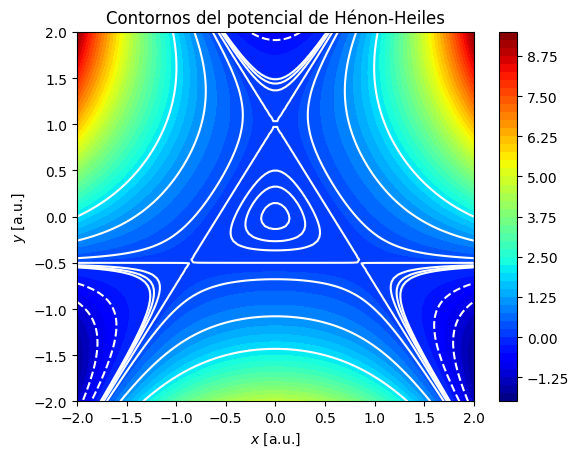

In [13]:
# Contornos del potencial
x = np.linspace(-2,2,100)
y = np.linspace(-2,2,100)
X,Y = np.meshgrid(x,y)
U = U_hh(X,Y)

fig,ax = plt.subplots()
cont = ax.contourf(X,Y,U,levels=50,cmap='jet')
ax.contour(X,Y,U,levels=[-1,-0.5,0.01,1/24,1/12,1/6,1/3,1,2],colors='w')
ax.set_title('Contornos del potencial de Hénon-Heiles')
ax.set_xlabel(r'$x$ [a.u.]')  # a.u. es 'arbitrary units'
ax.set_ylabel(r'$y$ [a.u.]')
plt.colorbar(cont)
plt.show()

Llevando la gráfica anterior a un sistema tridimensional, se obtiene lo siguiente:

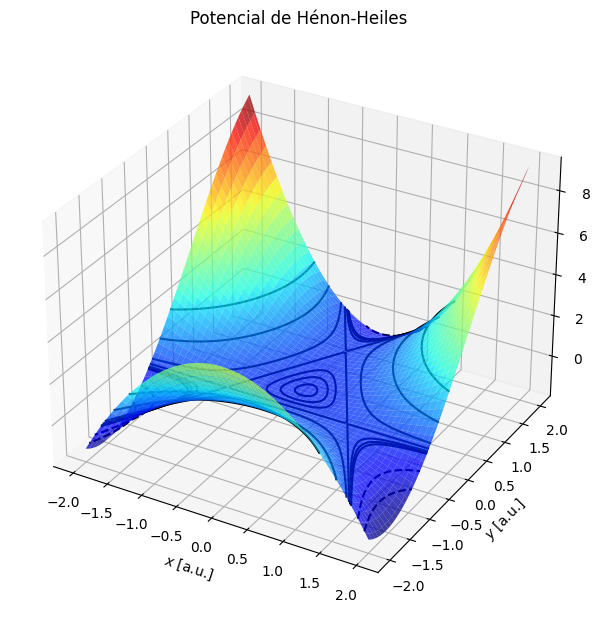

In [14]:
# Superficie del potencial
fig, ax = plt.subplots(subplot_kw={"projection": "3d"},figsize=(7.5,7.5))
ax.plot_surface(X,Y,U,cmap='jet',alpha=0.75)
ax.contour(X,Y,U,levels=[-1,-0.5,0.01,1/24,1/12,1/6,1/3,1,2],colors='k')

ax.set_title('Potencial de Hénon-Heiles')
ax.set_xlabel(r'$x$ [a.u.]')
ax.set_ylabel(r'$y$ [a.u.]')
ax.set_zlabel(r'$U$ [a.u.]')

plt.show()

**b) Ecuaciones hamiltonianas de movimiento:**

In [15]:
# Símbolos
H_sym,px_sym,py_sym,x_sym,y_sym,xd_sym,yd_sym,pxd_sym,pyd_sym = symbols('H,p_x,p_y,x,y,\dot{x},\dot{y},\dot{p}_x,\dot{p}_y')

Hamiltoniano de Hénon-Heiles:

In [16]:
# Hamiltoniano de Hénon-Heiles
Ham = px_sym**2/2 + py_sym**2/2 + (1/2)*(x_sym**2+y_sym**2) + x_sym**2*y_sym - y_sym**3/3 
Eq(H_sym,Ham)

Eq(H, p_x**2/2 + p_y**2/2 + x**2*y + 0.5*x**2 - y**3/3 + 0.5*y**2)

Ecuaciones de movimiento:

In [17]:
# Ecuaciones de movimiento
Eq(xd_sym,diff(Ham,px_sym))

Eq(\dot{x}, p_x)

In [18]:
Eq(pxd_sym,-diff(Ham,x_sym))

Eq(\dot{p}_x, -2*x*y - 1.0*x)

In [19]:
Eq(yd_sym,diff(Ham,py_sym))

Eq(\dot{y}, p_y)

In [20]:
Eq(pyd_sym,-diff(Ham,y_sym))

Eq(\dot{p}_y, -x**2 + y**2 - 1.0*y)

**c) Secciones de Poincaré:**

In [21]:
# Runge-Kutta 4
def RK4_step(f,y,t,h):

    K0 = h*f(t,y)
    K1 = h*f(t+0.5*h,y+0.5*K0)
    K2 = h*f(t+0.5*h,y+0.5*K1)
    K3 = h*f(t+h,y+K2)
    y1 = y + 1/6.0*(K0+2.0*K1+2.0*K2+K3)

    return y1

In [22]:
# Función de la dinámica del sistema
def func(t,Y):
    X0,Px0,Y0,Py0 = Y
    
    dx = Px0
    dpx = -X0 - 2*X0*Y0
    dy = Py0
    dpy = -Y0 - X0**2 + Y0**2
    
    return np.array([dx,dpx,dy,dpy])

In [23]:
# Parámetros para la sección de Poincaré
Xmax = 0
Ymax = 0.5
Pymax = 0.5

# Tolerancia de la sección de Poincaré
ϵ = 0.001

In [24]:
# Sección de Poincaré
def poincare_sec(E,N,tmax,h):
    ys = []
    pys = []
    
    # Búsqueda de condiciones iniciales
    for n in range(int(N)):
        while True:
            # Condiciones iniciales aleatorias
            x0 = -Xmax + 2*np.random.random()*Xmax
            y0 = -Ymax + 2*np.random.random()*Ymax
            py0 = -2*Pymax + 2*np.random.random()*Pymax
            # p_x definido por la energía, debe ser positivo
            px02 = 2*E - py0**2 - (x0**2+y0**2)-2*(x0**2*y0 - y0**3/3)
            if px02>=0:
                px0 = px02**0.5
                break
        
        X = [x0,]
        Px = [px0,]
        Y = [y0,]
        Py = [py0,]
        
        # Integración de las ecuaciones de movimiento
        i = 0
        for t in np.arange(0,tmax,h):
            y = [X[i],Px[i],Y[i],Py[i]]
            Xi,Pxi,Yi,Pyi = RK4_step(func,y,t,h)
            
            if abs(Xi)<ϵ:
                ys.append(Yi)
                pys.append(Pyi)
            
            X.append(Xi)
            Px.append(Pxi)
            Y.append(Yi)
            Py.append(Pyi)
            i += 1

    plt.figure( figsize=(6,6) )
    plt.plot( ys, pys, ".", ms=2.5 )
    plt.title( "Sección de Poincaré para $E =$%1.3f"%(E), fontsize=14 )
    plt.grid(1)
    plt.xlabel("$y$", fontsize=14)
    plt.ylabel("$p_y$", fontsize=14)
    return None  

En la próxima celda se muestran las secciones de Poincaré para los valores de energía:

```
E = [1/100,1/24,1/12,1/8,1/6]
```

<span style="color:red">La ejecución del código puede tardar alrededor de **10 minutos**.</span>

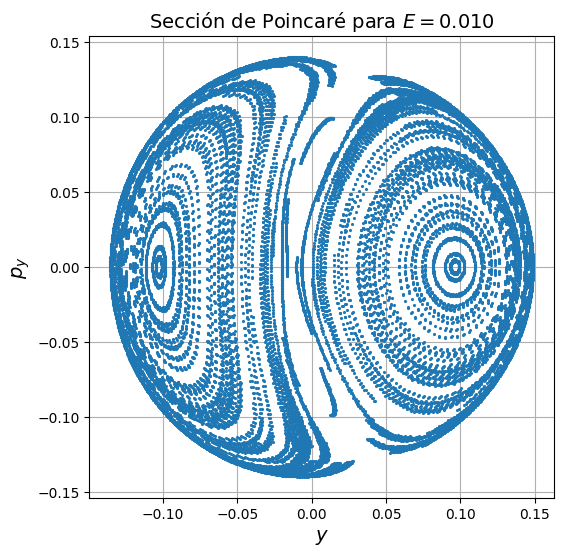

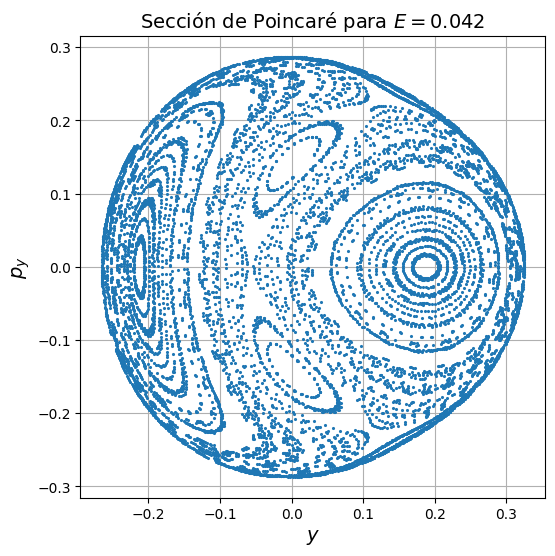

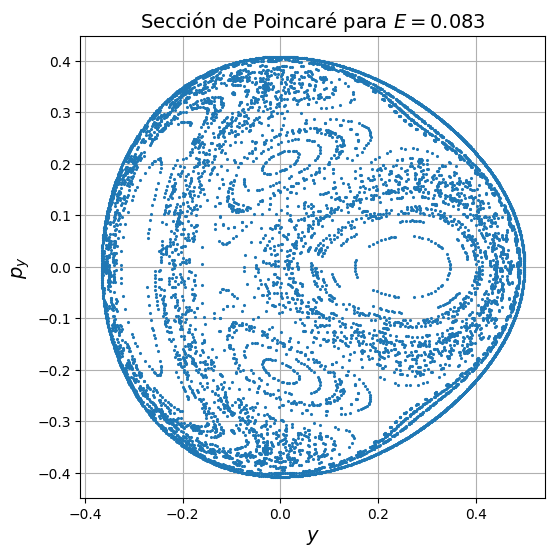

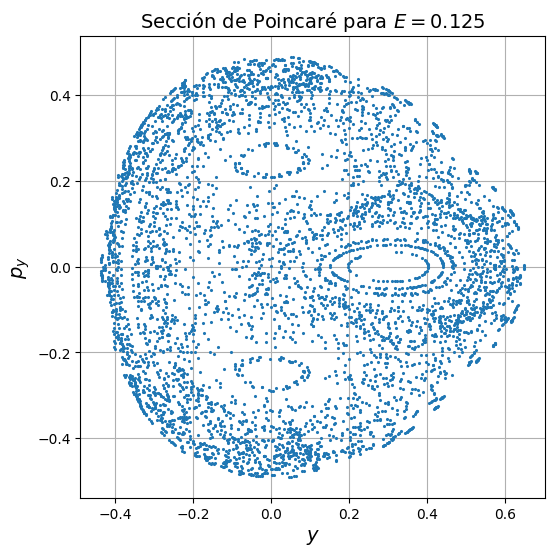

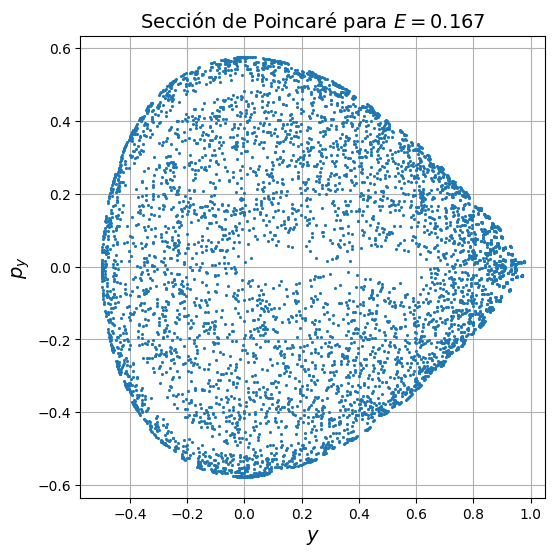

In [25]:
# Secciones de Poincaré para algunas energías
Es = [1/100,1/24,1/12,1/8,1/6]
for E in Es:
    poincare_sec(E,50,500.,0.01)

**d) Trayectoria en el espacio de configuración:**

In [26]:
# Trayectorias, gráfica interactiva
def trajectories(E):
    while True:
        x0 = -Xmax + 2*np.random.random()*Xmax
        y0 = -Ymax + 2*np.random.random()*Ymax
        py0 = -2*Pymax + 2*np.random.random()*Pymax
        px02 = 2*E - py0**2 - (x0**2+y0**2)-2*(x0**2*y0 - y0**3/3)
        if px02>=0:
            px0 = px02**0.5
            break

    init = [[x0],[px0],[y0],[py0]]

    i = 0
    Xs,Pxs,Ys,Pys = init
    for t in np.arange(0,100,0.1):
        y = [Xs[i],Pxs[i],Ys[i],Pys[i]]
        Xi,Pxi,Yi,Pyi = RK4_step(func,y,t,0.1)

        Xs.append(Xi)
        Pxs.append(Pxi)
        Ys.append(Yi)
        Pys.append(Pyi)
        i += 1

    plt.plot(Xs,Ys,'cyan')
    cont = plt.contourf(X,Y,U,levels=100,cmap='CMRmap')
    plt.contour(X,Y,U,levels=[E],colors='yellow')
    # plt.xlim(-1.25,1.25)
    # plt.ylim(-1.,1.5)
    #plt.axis('equal')
    plt.colorbar(cont)
    plt.title('Trayectorias en el espacio de configuración')
    return None

A continuación se muestra un gráfico interactivo al que se le puede cambiar el valor de la energía `E` y que muestra cómo son las respectivas trayectorias en el espacio de configuración para dicho valor de `E`.

In [27]:
opciones=dict(continuous_update=1,readout_format=".5f")
slider_E = widgets.FloatSlider(value=np.random.uniform(1e-4,1/6), min=1e-5, max=1/6,
                              step=1e-5, description='E',**opciones)

interactive_plot1 = interactive(trajectories,E=slider_E)
interactive_plot1

interactive(children=(FloatSlider(value=0.040039631552581424, description='E', max=0.16666666666666666, min=1e…

**e) Hamiltoniano de Hénon-Heiles vs energía:**

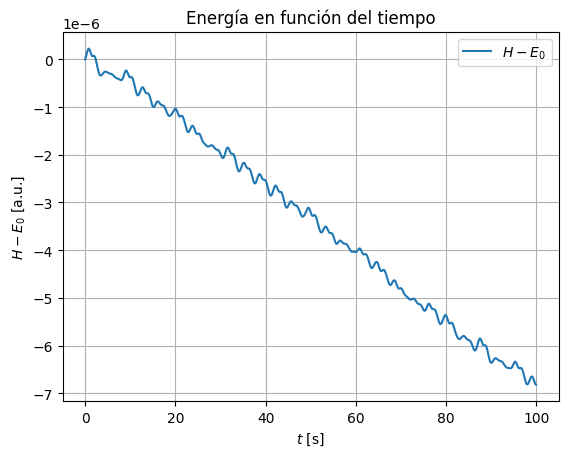

In [23]:
# Gráfica de la energía para ver si es constante
while True:
    x0 = -Xmax + 2*np.random.random()*Xmax
    y0 = -Ymax + 2*np.random.random()*Ymax
    py0 = -2*Pymax + 2*np.random.random()*Pymax
    px02 = 2*E - py0**2 - (x0**2+y0**2)-2*(x0**2*y0 - y0**3/3)
    if px02>=0:
        px0 = px02**0.5
        break   

init = [[x0],[px0],[y0],[py0]]

i = 0
Xs,Pxs,Ys,Pys = init
for t in np.arange(0,100,0.1):
    y = [Xs[i],Pxs[i],Ys[i],Pys[i]]
    Xi,Pxi,Yi,Pyi = RK4_step(func,y,t,0.1)

    Xs.append(Xi)
    Pxs.append(Pxi)
    Ys.append(Yi)
    Pys.append(Pyi)
    i += 1
    
Hamiltonian_hh = np.vectorize(lambdify([x_sym,y_sym,px_sym,py_sym],Ham))
H = Hamiltonian_hh(Xs,Ys,Pxs,Pys)

ts = np.arange(0,100,0.1)

plt.plot(ts,H[:-1]-E,label=r'$H-E_0$')
plt.grid()
plt.title('Energía en función del tiempo')
plt.xlabel(r'$t$ [s]')
plt.ylabel(r'$H-E_0$ [a.u.]')
plt.legend()
plt.show()

**f) $x$, $y$, $p_x$, y $p_y$ en función del tiempo:**

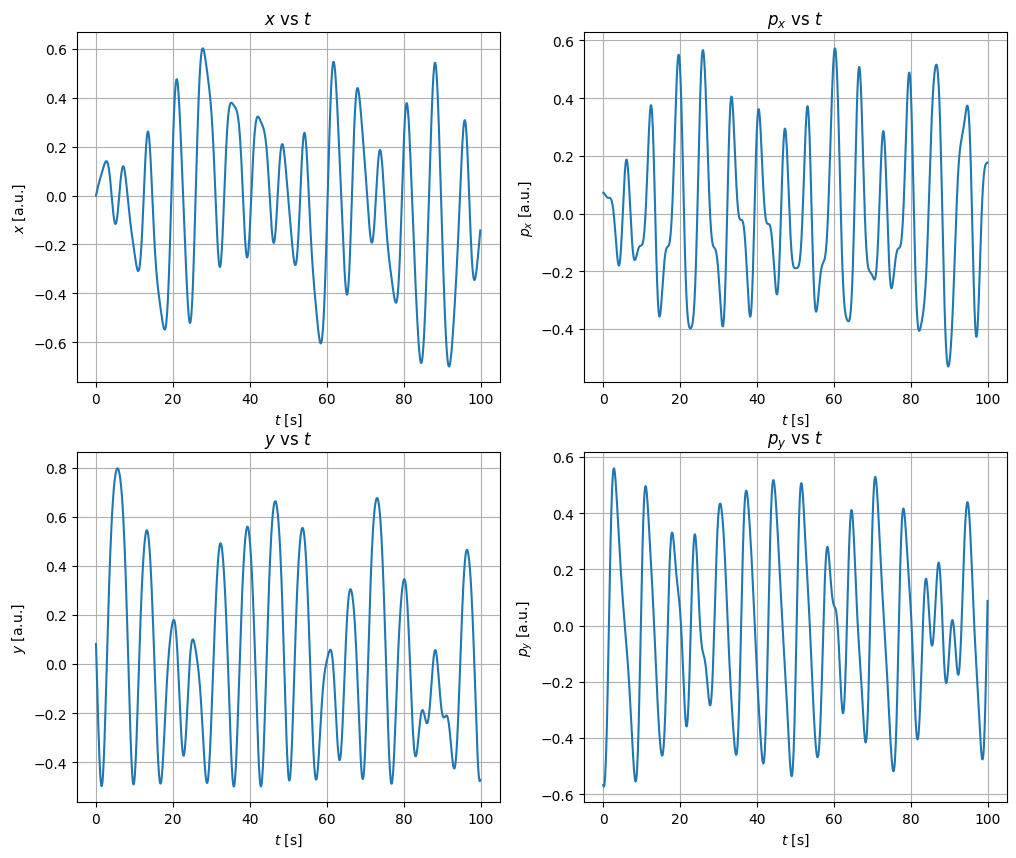

In [24]:
# Coordenadas del espacio de fase en función del tiempo

fig, axs = plt.subplots(2,2,figsize=(12,10))

axs[0,0].plot(ts,Xs[:-1])
axs[0,0].grid()
axs[0,0].set_title(r'$x$ vs $t$')
axs[0,0].set_xlabel('$t$ [s]')
axs[0,0].set_ylabel('$x$ [a.u.]')

axs[0,1].plot(ts,Pxs[:-1])
axs[0,1].grid()
axs[0,1].set_title(r'$p_x$ vs $t$')
axs[0,1].set_xlabel('$t$ [s]')
axs[0,1].set_ylabel('$p_x$ [a.u.]')

axs[1,0].plot(ts,Ys[:-1])
axs[1,0].grid()
axs[1,0].set_title(r'$y$ vs $t$')
axs[1,0].set_xlabel('$t$ [s]')
axs[1,0].set_ylabel('$y$ [a.u.]')

axs[1,1].plot(ts,Pys[:-1])
axs[1,1].grid()
axs[1,1].set_title(r'$p_y$ vs $t$')
axs[1,1].set_xlabel('$t$ [s]')
axs[1,1].set_ylabel('$p_y$ [a.u.]')

plt.show()

## Análisis de la solución:

- En la gráfica de los contornos de potencial, se puede evidenciar que para valores de energía inferiores a $\frac{1}{6}$ se tienen curvas cerradas contenidas en el interior de un triángulo equilátero, como se puede apreciar en la _Figura 2_.

<p>
<img src="https://user-images.githubusercontent.com/80116483/285251713-f71c7943-799a-4f29-8780-ee405fd4f4a7.png" align="center" width="500">

</p>

_Figura 2: Contornos de potencial para valores de energía inferiores a 1/6._

- Por otro lado, para valores de energía superiores a $\frac{1}{6}$, aparecen curvas exteriores al triángulo equilátero que divergen a lo largo de unas asíntotas, como se muestra en la _Figura 3_. Cabe resaltar que el valor exacto de energía $E=\frac{1}{6}$ corresponde a dicho triángulo equilátero.

<p>
<img src="https://user-images.githubusercontent.com/80116483/285251703-ead04042-ca63-412d-a8da-415f24bc0707.png" align="center" width="500">

</p>

_Figura 3: Contornos de potencial para valores de energía superiores a 1/6._

- Con respecto a las secciones de Poincaré, se puede evidenciar que para valores pequeños de la energía el comportamiento de los puntos se acomoda muy bien a un conjunto de curvas cerradas, pero mientras más se aumentan dichos valores de energía, más se va tendiendo al caos. Esto se puede ver con claridad en la _Figura 4_.

<p>
<img src="https://user-images.githubusercontent.com/80116483/285256850-d00c73eb-dfdf-4c9e-af2d-5dce86a85ae3.png" align="center" width="500">

</p>

_Figura 4: comparación entre dos secciones de Poincaré para valores de energía distintos._

- Al aumentar el valor de la energía a 0.125, las regiones donde se encontraron órbitas ovaladas para la energía más baja E = 0.083 todavía producen trayectorias cerradas con puntos fijos en sus centros; sin embargo, en las regiones entre estas trayectorias cerradas no hay una curva continua y los puntos allí parecen no tener regularidad, como se muestra en la _Figura 5_. Si se sigue el orden en que aparecen estos puntos dispersos, se ve claramente que, en lugar de seguir una curva regular, saltan de forma más o menos aleatoria de una parte del tramo de Poincaré a otra. Todos los puntos dispersos de la _Figura 5_ surgieron de la misma trayectoria caótica única, y la región caótica donde aparecen en las figuras constituye una sección transversal de un atractor extraño. En otras palabras, todos se originan a partir de una única órbita que serpentea a través de la extraña región atractora del espacio de fases y penetra repetidamente y aleatoriamente la sección de Poincaré a lo largo de la región caótica de esta sección.

<p>
<img src="https://user-images.githubusercontent.com/80116483/285271913-f8aac878-0eb7-456b-a81e-10f658237cac.png" align="center" width="500">

</p>

_Figura 5: sección Poincaré para E=0.125._

- Elevar aún más la energía hasta el valor crítico E = 0.167 hace que el atractor extraño llene la mayor parte del espacio de fase disponible, y esto tiene el efecto de extender la región caótica para incluir casi toda el área accesible de la _Figura 6_. Un índice de la extensión del caos es la fracción de la región accesible donde los puntos calculados se encuentran en trayectorias regulares. El área relativa de la región regular disminuye a medida que aumenta la energía. La región de regularidad disminuye con la energía hasta que el caos completo ocurre aproximadamente en E = 0.167.

<p>
<img src="https://user-images.githubusercontent.com/80116483/285274221-51381f21-b6c0-4391-9011-cc1528b5b52d.png" align="center" width="500">

</p>

_Figura 6: sección Poincaré para E=0.167._

- Con respecto a las trayectorias en el espacio de configuración, se ve claramente que estas se encuentran acotadas por el contorno de potencial correspondiente a la constante de energía mecánica seleccionada. En estas trayectorias se logra evidenciar simetría y periodicidad; no obstante, también es claro que estas trayectorias son muy sensibles al cambio en la energía E.

- Observando la evolución temporal de la diferencia entre el hamiltoniano y la energía, se aprecia que la tendencia de este valor se asemeja a una línea recta decreciente de pendiente pequeña.

- Las gráficas de evolución temporal de $x$, $p_x$, $y$ y $p_y$ muestran que dichos valores se comportan de manera oscilante, pero con amplitud variable y ligeros cambios en la posición de equilibrio.

## Conclusiones y perspectivas:

- Siguiendo las curvas al interior del triángulo equilátero en la _Figura 2_, se puede ver que para valores tales que E << 0.167, los términos de perturbación cúbica $x^2 y − \frac{1}{3}y^3$ de la ecuación [Ec. 2], son insignificantes en relación con los términos de potencial del oscilador armónico cuadrático, $\frac{1}{2} (x^2 + y^2)$, y las curvas son prácticamente círculos centrados en $x = y = 0$. Cuando los términos cúbicos son apreciables para E < 0.167, las equipotenciales forman curvas cerradas como se muestra, y para E = 0.167, la curva se convierte en un triángulo equilátero. Para energías superiores a 0.167, las equipotenciales (véase en la _Figura 3_) se encuentran más allá del triángulo equilátero, son abiertas y divergen hasta el infinito. Por tanto, la magnitud de la energía determina si los términos cúbicos constituyen o no una perturbación, o si sirven como términos potenciales principales.

- En las secciones de Poincaré se puede ver que una línea horizontal dibujada para $ \dot{y} = 0$ es una línea de simetría especular y las curvas sobre esta línea son imágenes especulares de las que están debajo de ella. Esta simetría resulta de que el hamiltoniano es invariante bajo la transformación $\dot{y} → −\dot{y}$, pero no invariante bajo la transformación $y → −y$ porque las potencias impares de $y$ en la ecuación [Ec. 2] producen asimetría en la dirección $y$.

- El caos de las secciones de Poincaré a medida que aumenta el valor de la energía E, también puede verse como una ruptura de la integrabilidad. Las trayectorias apreciables de la _Figura 7_ para E = 0.083 se pueden obtener integrando las ecuaciones de movimiento para condiciones iniciales particulares; los resultados obtenidos al realizar las integraciones son únicos y reproducibles, y el camino seguido por el punto de posición es predecible. A la energía más alta E = 0.125, las ecuaciones son integrables para algunas condiciones iniciales, pero producen puntos ubicados aleatoriamente en la región caótica para otras condiciones iniciales, de acuerdo con la _Figura 5_. Para E = 0.167, la integrabilidad se descompone prácticamente en toda la región accesible del espacio de fase representada en la _Figura 6_. Otra característica interesante del caos es la aparición de las llamadas islas. Para acoplamientos muy pequeños, como para energías en el rango E ∼ 0.01, la sección ${p_y}$ versus $y$ consiste en órbitas cerradas ligeramente perturbadas por ser circulares. La perturbación es mucho mayor para la energía E = 0.083 produce cuatro conjuntos de órbitas de tipo elíptica, y el aumento de la energía a E = 0.125 da como resultado la aparición de cinco islas de integrabilidad a lo largo del borde de la región caótica en la lado derecho de la _Figura 5_. La _Figura 6_ muestra que tales islas persisten incluso cuando reina un caos casi completo.

- Con respecto a la tercera integral que buscaban Hénon y Heiles, estos concluyeron en su tiempo que, dado el potencial y las órbitas con un cierto momentum angular y con una cierta energía, si esta última es pequeña, hay indicios de que una tercera integral aislada siempre existe. Tal vez sea sólo una cuasi integral; pero entonces, para la precisión de las computadoras, es como una verdadera integral. Si la energía es mayor que la energía crítica (E=0.167), hay un número infinito de regiones separadas en el espacio de fases donde todavía parece existir esa tercera integral [1].

- Comparando el hamiltoniano $H$ con la energía $E_0$ en la gráfica del punto f) de la solución, se puede decir que dado el orden de magnitud de los valores de la línea recta decreciente, para pequeños lapsos de tiempo el hamiltoniano y la energía coinciden.

## Referencias

[1] Hénon, M., & Heiles, C. (1964). *The applicability of the third integral of motion: some numerical experiments*. Astronomical Journal, Vol. 69, p. 73 (1964), 69, 73.

[2] Landau, L y Lifshitz, E. (1960). *Mecánica*. Pergamon Press plc.

[3] Goldstein, H., Poole, C., & Safko, J. (2002). *Classical mechanics*.

[4] Duffing equation. (7 de octubre de 2023). En _Wikipedia_. https://en.wikipedia.org/wiki/Duffing_equation

[5] Restrepo, D. (2002). Computational Methods for Physics & Astronomy. Github: Repositorio de Diego Restrepo. https://restrepo.github.io/ComputationalMethods/index.html.